## Installing required packages
Install any python packages by performing the following commands in the terminal or command prompt:

`pip install <package_name>`

or

`conda install <package_name>`

based on the python environment of your choice

In [1]:
import numpy as np
import pandas as pd

In [10]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saroopa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /Users/saroopa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [278]:
df = pd.read_csv("./train.csv")
df.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [279]:
print("Total records in the data frame: {}" .format(df.shape[0]))

Total records in the data frame: 6079


In [281]:
df.corr()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
qa_id,1.000000,0.019359,0.001215,-0.004922,-0.002734,0.000677,0.002098,-0.017004,-0.000935,0.006898,...,-0.004029,-0.005641,0.013283,0.005485,0.000909,0.001981,-0.003762,-0.017210,0.007738,0.007136
question_asker_intent_understanding,0.019359,1.000000,0.248283,0.069147,0.115719,-0.119989,-0.042387,0.041985,0.235507,-0.055113,...,0.271778,0.153192,0.036220,0.173906,0.061022,0.080308,-0.069215,-0.052325,-0.044156,0.115094
question_body_critical,0.001215,0.248283,1.000000,0.134744,0.110006,0.017156,-0.053809,0.210505,0.191975,-0.130574,...,0.388172,-0.067796,0.075048,-0.043678,-0.016369,0.002452,-0.213847,-0.069160,0.004631,0.031500
question_conversational,-0.004922,0.069147,0.134744,1.000000,-0.092885,-0.412059,-0.407895,0.157942,0.201555,0.007646,...,0.153880,-0.041928,0.010218,-0.028974,-0.023719,-0.035357,-0.242021,-0.084374,0.094524,0.047198
question_expect_short_answer,-0.002734,0.115719,0.110006,-0.092885,1.000000,-0.090800,0.326959,-0.038257,-0.160279,-0.227785,...,-0.123483,0.095115,0.097480,0.048566,0.090170,0.129107,0.064498,-0.180461,-0.071567,0.044827
question_fact_seeking,0.000677,-0.119989,0.017156,-0.412059,-0.090800,1.000000,0.276906,-0.037801,0.008593,0.087934,...,0.103997,-0.113108,-0.049916,-0.125093,-0.078836,-0.052860,-0.057832,0.154646,0.066530,-0.145880
question_has_commonly_accepted_answer,0.002098,-0.042387,-0.053809,-0.407895,0.326959,0.276906,1.000000,-0.180362,-0.342036,-0.086416,...,-0.246961,0.049203,0.020669,0.029065,0.051689,0.097280,0.186435,-0.006229,-0.023365,-0.086773
question_interestingness_others,-0.017004,0.041985,0.210505,0.157942,-0.038257,-0.037801,-0.180362,1.000000,0.572152,0.045346,...,0.189953,-0.046859,0.032855,-0.014504,-0.001221,-0.027452,-0.163019,-0.090484,0.097320,0.075336
question_interestingness_self,-0.000935,0.235507,0.191975,0.201555,-0.160279,0.008593,-0.342036,0.572152,1.000000,0.034488,...,0.370318,-0.015698,-0.014285,0.028280,-0.033675,-0.030369,-0.227690,-0.095363,0.053524,0.120144
question_multi_intent,0.006898,-0.055113,-0.130574,0.007646,-0.227785,0.087934,-0.086416,0.045346,0.034488,1.000000,...,0.079219,-0.053220,-0.044616,-0.033249,-0.032248,-0.091863,-0.147953,0.042438,0.201272,0.005128


In [ ]:
x_columns = list()
x_columns.append("qa_id")

for x in df.columns.values[1:].tolist()[0:10] :
    x_columns.append(x)

y_columns = df.columns.values[1:].tolist()[10:40]

x_columns

In [5]:
def returnColumn(x, start, stop) :
    return list(x[start:stop])

In [6]:
X = list()
for row in df.values :
    X.append(returnColumn(row, 0, 11))
X = pd.DataFrame(X, columns=x_columns)
X.head()
X.shape

(6079, 11)

In [7]:
Y = list()
for row in df.values:
    Y.append(returnColumn(row, 11, 41))
Y = pd.DataFrame(Y, columns=y_columns)
Y.head()
Y.shape

(6079, 30)

In [389]:
from sklearn.model_selection import train_test_split

In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(4863, 11) (4863, 30)
(1216, 11) (1216, 30)


### Data Visualization

In [311]:
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles

Text(0.5, 1, '\nCorrelation among Y columns\n')

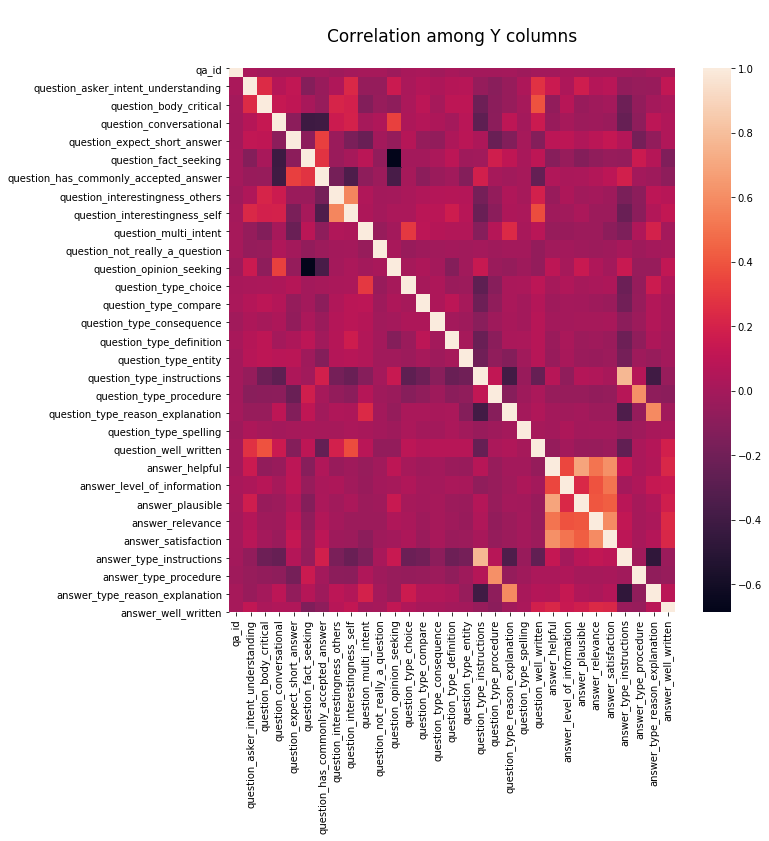

In [290]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.title("\nCorrelation among Y columns\n", size=17)

In [276]:
train_category = X_train['category'].value_counts()
test_category = X_test['category'].value_counts()

Train/Test category distribution


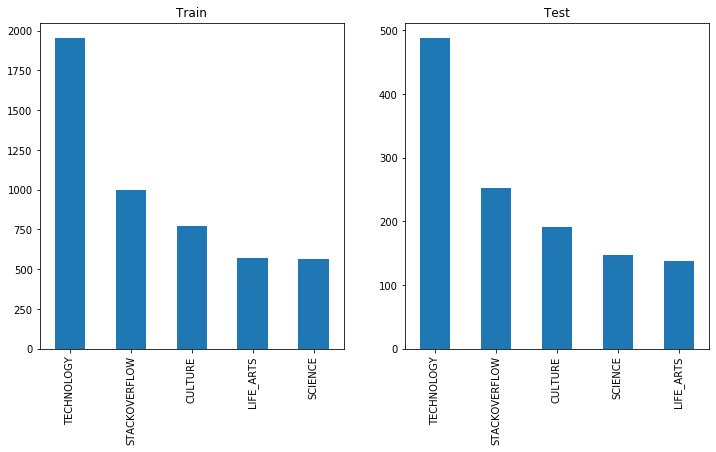

In [277]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
train_category.plot(kind='bar', ax=axes[0])
axes[0].set_title('Train')
test_category.plot(kind='bar', ax=axes[1])
axes[1].set_title('Test')
print('Train/Test category distribution')

In [268]:
def plot_wordcloud(text, ax, title=None):
    wordcloud = WordCloud(max_font_size=None, background_color='white',
                          width=1200, height=1000).generate(text_cat)
    ax.imshow(wordcloud)
    if title is not None:
        ax.set_title(title)
    ax.axis("off")

Training data Word Cloud


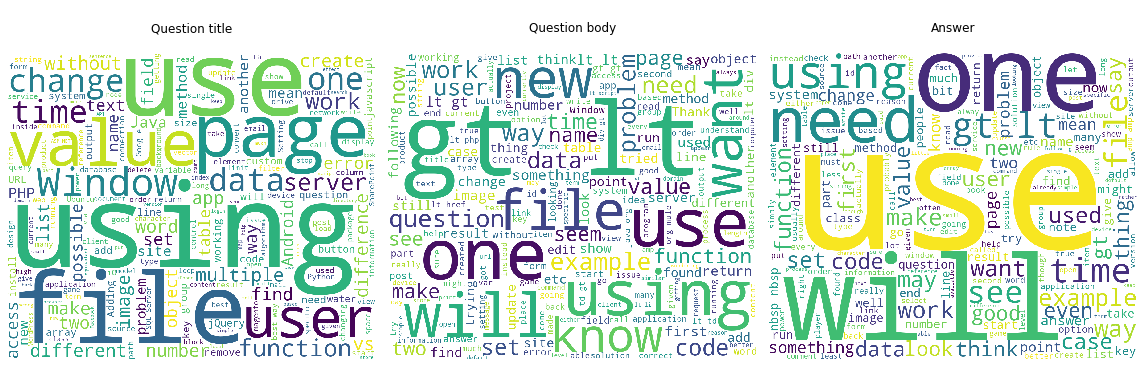

In [294]:
print('Training data Word Cloud')

fig, axes = plt.subplots(1, 3, figsize=(16, 18))

text_cat = ' '.join(X_train['question_title'].values)
plot_wordcloud(text_cat, axes[0], '\nQuestion title\n')

text_cat = ' '.join(X_train['question_body'].values)
plot_wordcloud(text_cat, axes[1], '\nQuestion body\n')

text_cat = ' '.join(X_train['answer'].values)
plot_wordcloud(text_cat, axes[2], '\nAnswer\n')

plt.tight_layout()
fig.show()

Test data Word Cloud


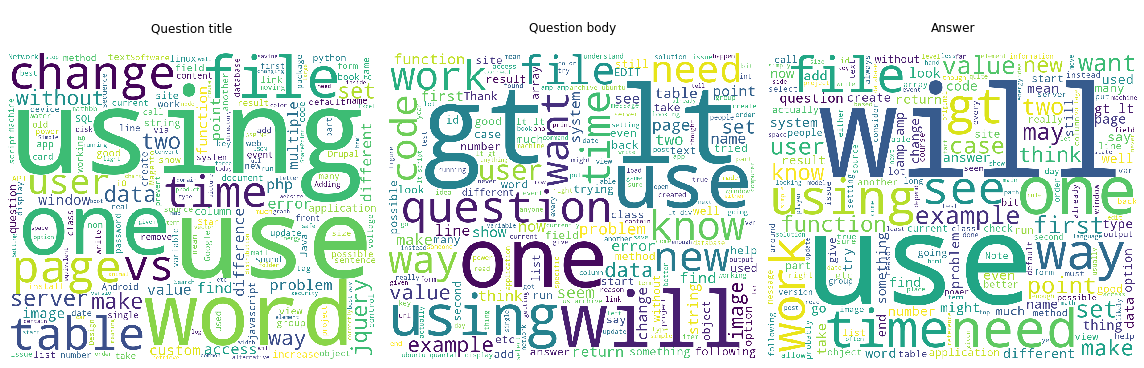

In [292]:
print('Test data Word Cloud')

fig, axes = plt.subplots(1, 3, figsize=(16, 18))

text_cat = ' '.join(X_test['question_title'].values)
plot_wordcloud(text_cat, axes[0], '\nQuestion title\n')

text_cat = ' '.join(X_test['question_body'].values)
plot_wordcloud(text_cat, axes[1], '\nQuestion body\n')

text_cat = ' '.join(X_test['answer'].values)
plot_wordcloud(text_cat, axes[2], '\nAnswer\n')

plt.tight_layout()
fig.show()

Text(0.5, 1.0, '\nComparison of Question and Answer Users')

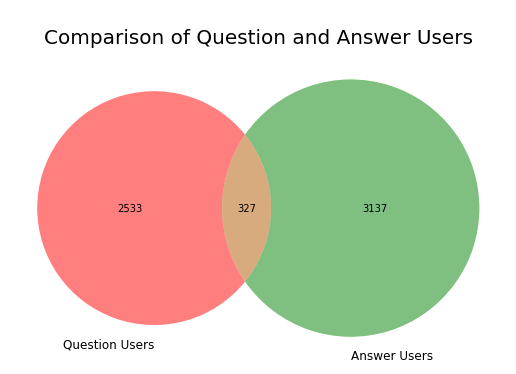

In [320]:
plt.figure(figsize=(9,8))

venn2([set(X_train['question_user_name'].value_counts(dropna=True).index), 
       set(X_train['answer_user_name'].value_counts(dropna=True).index)],
      set_labels=('Question Users', 'Answer Users'), alpha=.5)
plt.title('\nComparison of Question and Answer Users', fontsize=20)

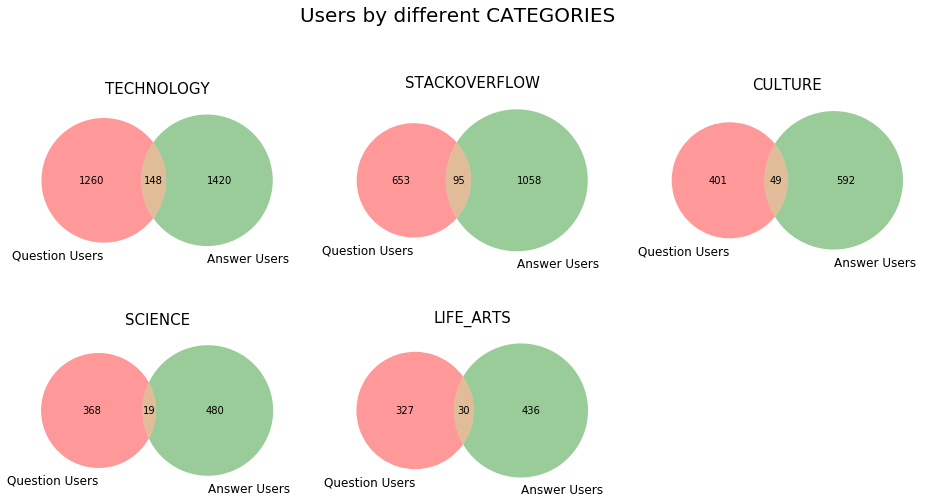

In [318]:
import matplotlib.gridspec as gridspec # to do the grid of plots

grid = gridspec.GridSpec(3, 3)
plt.figure(figsize=(16,3*4))

plt.suptitle('Users by different CATEGORIES', size=20)

for n, col in enumerate(df['category'].value_counts().index):
    ax = plt.subplot(grid[n])
    venn2([set(df[df.category == col]['question_user_name'].value_counts(dropna=False).index), 
           set(df[df.category == col]['answer_user_name'].value_counts(dropna=False).index)],
      set_labels=('Question Users', 'Answer Users'), )
    ax.set_title(str(col), fontsize=15)
    
plt.subplots_adjust(top = 0.9, hspace=.1)


In [12]:
from nltk.corpus import stopwords

In [13]:
stopwords = stopwords.words('english')
q_body_stopwords = X_train['question_body'].apply(lambda x : [x for x in x.split() if x in stopwords])
answer_stopwords = X_train['answer'].apply(lambda x: [x for x in x.split() if x in stopwords])

Text(0.5, 1.0, 'Distribution of stopwords in  Answer')

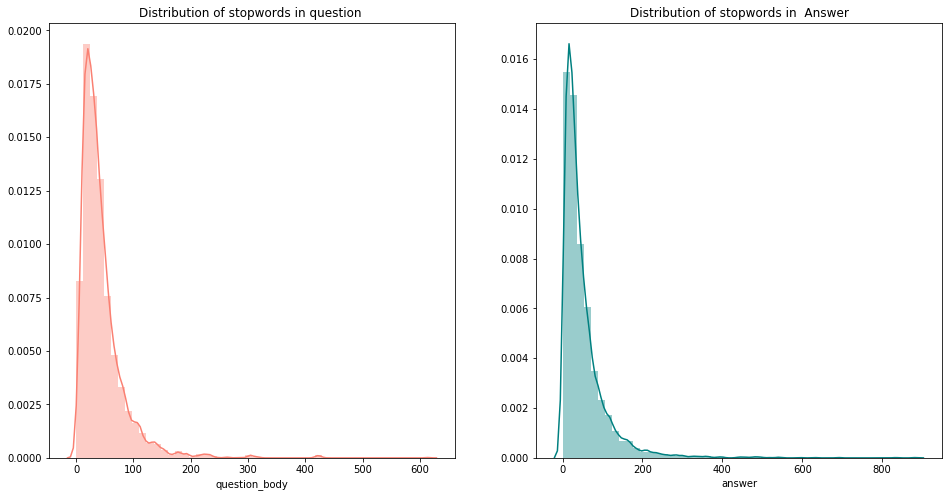

In [386]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
words = q_body_stopwords.apply(lambda x : len(x))
sns.distplot(words, color='salmon', ax=ax1)
ax1.set_title('Distribution of stopwords in question ')
words = answer_stopwords.apply(lambda x: len(x))
sns.distplot(words, color='teal', ax=ax2)
ax2.set_title('Distribution of stopwords in  Answer')

In [44]:
df["answer"][77]

"I find existing answers rather confusing.  \n\nViews (as we know) is extremely cool module. It supports localization plugins.\nGo to page admin/structure/views/settings/advanced to see for yourself:\n\n\n\nPreferred way to translate Views is to use Internationalization Views module which depends on i18n_string (i18n package) module.\nHow to use? Just enable Internationalization Views and go to translate page for your view.\n\nYou also may be interested in i18n_string settings here: admin/config/regional/i18n/strings.\nCore localization plugin just do t() for Views titles, headers, footers etc. It's not so flexible and secure, but as a developer you can choose this method in some cases.\nHow to use? Nothing special here. Your strings will appear in Drupal translate interface after the first request.\n\n\nYou can disable localisation at all or create your own plugin if you need. \n"

### Remove punctuations from corpus

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
q_title_no_punct = list()
for line in df["question_title"] :
    q_title_no_punct.append(line.translate(str.maketrans('', '', string.punctuation)))

q_body_no_punct = list()
for line in df["question_body"] :
    q_body_no_punct.append(line.translate(str.maketrans('', '', string.punctuation)))

answer_no_punct = list()
for line in df["answer"] :
    answer_no_punct.append(line.translate(str.maketrans('', '', string.punctuation)))

In [17]:
answer_no_punct[77]

'I find existing answers rather confusing  \n\nViews as we know is extremely cool module It supports localization plugins\nGo to page adminstructureviewssettingsadvanced to see for yourself\n\n\n\nPreferred way to translate Views is to use Internationalization Views module which depends on i18nstring i18n package module\nHow to use Just enable Internationalization Views and go to translate page for your view\n\nYou also may be interested in i18nstring settings here adminconfigregionali18nstrings\nCore localization plugin just do t for Views titles headers footers etc Its not so flexible and secure but as a developer you can choose this method in some cases\nHow to use Nothing special here Your strings will appear in Drupal translate interface after the first request\n\n\nYou can disable localisation at all or create your own plugin if you need \n'

### Remove stop-words from the corpus

In [18]:
from gensim.parsing.preprocessing import remove_stopwords

In [181]:
q_title_no_sw = list()
# for x in df["question_title"] :
for x in q_title_no_punct :
    q_title_no_sw.append(remove_stopwords(x).lower())

q_body_no_sw = list()
# for x in df["question_body"] :
for x in q_body_no_punct :
    q_body_no_sw.append(remove_stopwords(x).lower())

answer_no_sw = list()
# for x in df["answer"] :
for x in answer_no_punct :
    answer_no_sw.append(remove_stopwords(x).lower())

In [20]:
answer_no_sw[77]

'I existing answers confusing Views know extremely cool module It supports localization plugins Go page adminstructureviewssettingsadvanced Preferred way translate Views use Internationalization Views module depends i18nstring i18n package module How use Just enable Internationalization Views translate page view You interested i18nstring settings adminconfigregionali18nstrings Core localization plugin t Views titles headers footers Its flexible secure developer choose method cases How use Nothing special Your strings appear Drupal translate interface request You disable localisation create plugin need'

### Lemmatize the words in corpus

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
lemmatizer = WordNetLemmatizer()

In [182]:
q_title_lemmatized = list()
for line in q_title_no_sw :
    temp_list = list()
    for word in line.split() :
        temp_list.append(lemmatizer.lemmatize(lemmatizer.lemmatize(word.lower(), 'v')))
    q_title_lemmatized.append(' '.join(temp_list))

q_body_lemmatized = list()
for line in q_body_no_sw :
    temp_list = list()
    for word in line.split() :
        temp_list.append(lemmatizer.lemmatize(lemmatizer.lemmatize(word.lower(), 'v')))
    q_body_lemmatized.append(' '.join(temp_list))

answer_lemmatized = list()
for line in answer_no_sw :
    temp_list = list()
    for word in line.split() :
        temp_list.append(lemmatizer.lemmatize(lemmatizer.lemmatize(word.lower(), 'v')))
    answer_lemmatized.append(' '.join(temp_list))

In [60]:
answer_lemmatized[77]

'i exist answer confuse view know extremely cool module it support localization plugins go page adminstructureviewssettingsadvanced prefer way translate view use internationalization view module depend i18nstring i18n package module how use just enable internationalization view translate page view you interest i18nstring setting adminconfigregionali18nstrings core localization plugin t view title header footer it flexible secure developer choose method case how use nothing special your string appear drupal translate interface request you disable localisation create plugin need'

### Tokenize the documents in the corpora

In [ ]:
from nltk.tokenize import WordPunctTokenizer

In [25]:
tokenizer = WordPunctTokenizer()

### Create tokenized lists of question_title, question_body and answer

In [183]:
tokenized_q_title = list()
for line in q_title_lemmatized :
    tokenized_q_title.append(tokenizer.tokenize(line.lower()))

tokenized_q_body = list()
for line in q_body_lemmatized :
    tokenized_q_body.append(tokenizer.tokenize(line.lower()))

tokenized_answer = list()
for line in answer_lemmatized :
    tokenized_answer.append(tokenizer.tokenize(line.lower()))

In [172]:
# Checking if the answer block is well tokenized
tokenized_answer[77]

['i',
 'exist',
 'answer',
 'confuse',
 'view',
 'know',
 'extremely',
 'cool',
 'module',
 'it',
 'support',
 'localization',
 'plugins',
 'go',
 'page',
 'adminstructureviewssettingsadvanced',
 'prefer',
 'way',
 'translate',
 'view',
 'use',
 'internationalization',
 'view',
 'module',
 'depend',
 'i18nstring',
 'i18n',
 'package',
 'module',
 'how',
 'use',
 'just',
 'enable',
 'internationalization',
 'view',
 'translate',
 'page',
 'view',
 'you',
 'interest',
 'i18nstring',
 'setting',
 'adminconfigregionali18nstrings',
 'core',
 'localization',
 'plugin',
 't',
 'view',
 'title',
 'header',
 'footer',
 'it',
 'flexible',
 'secure',
 'developer',
 'choose',
 'method',
 'case',
 'how',
 'use',
 'nothing',
 'special',
 'your',
 'string',
 'appear',
 'drupal',
 'translate',
 'interface',
 'request',
 'you',
 'disable',
 'localisation',
 'create',
 'plugin',
 'need']

In [28]:
# Joining the tokenized answer
print(' '.join(tokenized_answer[34]))

i think need read project solution httpmsdnmicrosoftcomenuslibraryee817674aspx and clear have solution inside solution create project application project unittests in testproject add reference test framework choice reference applicationproject this way application know test compile assembly at time test depend application compile assembly testrunner guici use and answer question testproject need choose project type library console application work like


### Append all documents to a single list

In [190]:
all_sentences = list()      # All corpus available in the dataset

for line in tokenized_q_title :
    all_sentences.append(line)

for line in tokenized_q_body :
    all_sentences.append(line)

for line in tokenized_answer :
    all_sentences.append(line)

# print(all_sentences[100])

In [189]:
all_sentences[10065]

['werent', 'originally', 'go', 'star', 'war', 'film']

In [29]:
from gensim.models import Word2Vec

### Using Word2Vec model for vectorization

In [191]:
large_model = Word2Vec(all_sentences, size=50, min_count=1, window=6)
word_vectors = large_model.wv


In [192]:
large_model.wv.get_vector("stany")

array([ 0.04007109, -0.01355403,  0.09486054,  0.12215071,  0.04827198,
       -0.13541004,  0.16263653, -0.03417167,  0.11092672, -0.02923576,
       -0.12000198, -0.10518411,  0.18058588,  0.00878313, -0.00641701,
        0.10760028,  0.11947186, -0.01321357, -0.14805959,  0.07969231,
       -0.09739855, -0.16015299, -0.06438203,  0.16540733,  0.07416721,
       -0.0795261 ,  0.0856778 ,  0.09278062, -0.04082064, -0.11503213,
       -0.00793709, -0.0494216 ,  0.00332236,  0.01179693,  0.1033812 ,
        0.21193118, -0.01341721,  0.16038698, -0.01043086,  0.09666301,
        0.05533553,  0.0040501 ,  0.18394531, -0.01590221, -0.05099582,
        0.06735271,  0.11532994, -0.08056095, -0.01651808, -0.12971167],
      dtype=float32)

In [34]:
word_vectors.most_similar("view")
# large_model.most_similar(positive=["project"], negative=["wordpress"])

[('list', 0.9976896047592163),
 ('template', 0.9956943392753601),
 ('content', 0.995479941368103),
 ('custom', 0.9936923980712891),
 ('admin', 0.9931399822235107),
 ('data', 0.9929746389389038),
 ('meta', 0.9918120503425598),
 ('dynamically', 0.9916344285011292),
 ('html', 0.9912184476852417),
 ('contextual', 0.9910488724708557)]

In [35]:
# Select the 1000 most frequently used words and sort them in descending order based on their frequency of usage
words = sorted(word_vectors.vocab.keys(), key=lambda word: word_vectors.vocab[word].count, reverse=True)[:1000]

print(words[::100])

['i', 'take', 'site', 'bad', 'false', 'hide', 'by', 'measure', 'equal', 'develop']


In [115]:
def find_norm_of_word(word) :
    return np.linalg.norm(word_vectors.get_vector(word))

In [140]:
def find_norm_of_document(doc) :
    words = list()
    for token in doc :
        words.append(np.linalg.norm(word_vectors.get_vector(token)))

    doc_vec = np.asarray(words)
    return np.linalg.norm(doc_vec)

In [38]:
find_norm_of_word('local')

6.0645623

In [39]:
import re
from urllib.parse import urlparse
from category_encoders.one_hot import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler

In [40]:
ohe = OneHotEncoder(cols='category', drop_invariant=True)

before_dot = re.compile('^[^.]*')

def transformURL (x) :
    return x.apply(lambda v: re.findall(before_dot, urlparse(v).netloc)[0])

url_encoder = Pipeline([
    ('URL-transformer', FunctionTransformer(transformURL, validate=False)),
    ('URL-OHE', OneHotEncoder(drop_invariant=True))], verbose=True)

In [41]:
def count_words (data) :
    out = pd.DataFrame(index=data.index)
    for column in data.columns :
        out[column] = data[column].str.split().str.len()
    return out

word_counter = Pipeline([('WordCounter-transformer', FunctionTransformer(count_words, validate=False)), ('WordCounter-std', StandardScaler())], verbose=True)

In [163]:
def dimensionReducer (documents) :
    # out = pd.DataFrame(index=documents.index)
    # indices = [_ for _ in documents.index]
    temp_list = list()
    doc_norm = list()
    for document in documents :
        doc_no_punct = document.translate(str.maketrans('', '', string.punctuation))
        doc_no_sw = remove_stopwords(doc_no_punct)
        temp_list = list()
        for word in doc_no_sw.split() :
            temp_list.append(lemmatizer.lemmatize(lemmatizer.lemmatize(word.lower(), 'v')))
        lemmatized_doc = ' '.join(temp_list)
        tokenized_doc = tokenizer.tokenize(lemmatized_doc.lower())
        doc_norm.append(find_norm_of_document(tokenized_doc))

    return pd.DataFrame(doc_norm)

dim_reducer = Pipeline([('Dimension-reducing-transformer', FunctionTransformer(dimensionReducer, validate=False))])

In [196]:
preprocessor = ColumnTransformer([
    ('Q-T', dim_reducer, 'question_title'),
    ('Q-B', dim_reducer, 'question_body'),
    ('A', dim_reducer, 'answer'),
    ('URL', url_encoder, 'url'),
    ('Category', ohe, 'category'),
    ('W-C', word_counter, ['question_body', 'answer'])
], verbose=True)

preprocessor.fit(X_train)

[ColumnTransformer] ........... (1 of 6) Processing Q-T, total=   0.7s
[ColumnTransformer] ........... (2 of 6) Processing Q-B, total=   6.6s
[ColumnTransformer] ............. (3 of 6) Processing A, total=   6.5s
[Pipeline] ... (step 1 of 2) Processing URL-transformer, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing URL-OHE, total=   0.0s
[ColumnTransformer] ........... (4 of 6) Processing URL, total=   0.1s
[ColumnTransformer] ...... (5 of 6) Processing Category, total=   0.0s
[Pipeline]  (step 1 of 2) Processing WordCounter-transformer, total=   0.2s
[Pipeline] ... (step 2 of 2) Processing WordCounter-std, total=   0.0s
[ColumnTransformer] ........... (6 of 6) Processing W-C, total=   0.2s


ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('Q-T',
                                 Pipeline(memory=None,
                                          steps=[('Dimension-reducing-transformer',
                                                  FunctionTransformer(accept_sparse=False,
                                                                      check_inverse=True,
                                                                      func=<function dimensionReducer at 0x1a34e76378>,
                                                                      inv_kw_args=None,
                                                                      inverse_func=None,
                                                                      kw_args=None,
                                                                      validate=False))],
                                          ver...
      

In [197]:
X_train_array = preprocessor.transform(X_train)
X_test_array = preprocessor.transform(X_test)

In [200]:
print(X_train_array.shape)
X_train_array

(4863, 69)


array([[ 3.01585732e+01,  8.86597824e+01,  4.53370094e+01, ...,
         0.00000000e+00,  3.43493933e-01, -6.27547041e-01],
       [ 7.97257280e+00,  3.77837029e+01,  3.27900391e+01, ...,
         0.00000000e+00, -6.76170541e-01, -6.40598098e-01],
       [ 3.96314025e+00,  3.94032021e+01,  4.79399490e+01, ...,
         0.00000000e+00, -6.34381013e-01,  5.42921820e-03],
       ...,
       [ 2.46732368e+01,  6.33296318e+01,  3.73286743e+01, ...,
         1.00000000e+00, -4.33791280e-01, -5.81868342e-01],
       [ 2.05149803e+01,  4.51844025e+01,  3.25093117e+01, ...,
         0.00000000e+00, -6.34381013e-01, -6.14495984e-01],
       [ 1.12094545e+01,  8.05794601e+01,  7.65213547e+01, ...,
         1.00000000e+00,  7.61389210e-01,  7.29762876e-01]])

In [201]:
print(X_test_array.shape)
X_test_array

(1216, 69)


array([[ 1.56776886e+01,  4.68455276e+01,  7.00857162e+01, ...,
         0.00000000e+00, -5.84233580e-01,  1.29414259e-01],
       [ 2.57859898e+01,  9.56620026e+00,  5.71269646e+01, ...,
         0.00000000e+00, -9.93770950e-01, -1.90336635e-01],
       [ 1.92251453e+01,  4.31576195e+01,  6.15868683e+01, ...,
         0.00000000e+00, -6.09307296e-01,  2.53399299e-01],
       ...,
       [ 1.22956409e+01,  2.93323765e+01,  6.73725662e+01, ...,
         0.00000000e+00, -8.01539123e-01, -2.06728956e-02],
       [ 1.35758400e+01,  4.80685158e+01,  8.09570465e+01, ...,
         1.00000000e+00, -6.42738918e-01,  3.51282226e-01],
       [ 1.54102163e+01,  5.49104385e+01,  2.86395817e+01, ...,
         1.00000000e+00, -6.60434373e-02, -6.92802326e-01]])

### Model creation and training

In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [226]:
rf=RandomForestRegressor(n_estimators=1000, max_depth=500)
rf.fit(X_train_array, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=500, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [227]:
print(f"Train score : {rf.score(X_train_array, Y_train)}")
print(f"Test score : {rf.score(X_test_array, Y_test)}")

Train score : 0.8889457728171931
Test score : 0.17496546004620148


In [228]:
train_predictions_rf = rf.predict(X_train_array)
test_predictions_rf = rf.predict(X_test_array)

In [229]:
print(f"RMSE train:{metrics.mean_squared_error(Y_train, train_predictions_rf)**(1/2)}")
print(f"RMSE test:{metrics.mean_squared_error(Y_test, test_predictions_rf)**(1/2)}")

RMSE train:0.08248246552951262
RMSE test:0.22438518204581345


In [321]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [370]:
adr = MultiOutputRegressor(AdaBoostRegressor(n_estimators=2, learning_rate=0.1))
adr.fit(X_train_array, Y_train)

MultiOutputRegressor(estimator=AdaBoostRegressor(base_estimator=None,
                                                 learning_rate=0.1,
                                                 loss='linear', n_estimators=2,
                                                 random_state=None),
                     n_jobs=None)

In [371]:
print("AdaBoostRegressor")
print(f"Train score : {adr.score(X_train_array, Y_train)}")
print(f"Test score : {adr.score(X_test_array, Y_test)}")

AdaBoostRegressor
Train score : -0.0006277812820278654
Test score : -0.03960465522349162


In [372]:
train_predictions_adr = rf.predict(X_train_array)
test_predictions_adr = rf.predict(X_test_array)

In [373]:
print(f"RMSE train:{metrics.mean_squared_error(Y_train, train_predictions_adr)**(1/2)}")
print(f"RMSE test:{metrics.mean_squared_error(Y_test, test_predictions_adr)**(1/2)}")

RMSE train:0.30579604296515983
RMSE test:0.27219959769277957


In [374]:
gbr = MultiOutputRegressor(GradientBoostingRegressor(max_depth=100, max_features=20, max_leaf_nodes=200))
gbr.fit(X_train_array, Y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls',
                                                         max_depth=100,
                                                         max_features=20,
                                                         max_leaf_nodes=200,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                     

In [375]:
print("GradientBoostingRegressor")
print(f"Train score : {gbr.score(X_train_array, Y_train)}")
print(f"Test score : {gbr.score(X_test_array, Y_test)}")

GradientBoostingRegressor
Train score : 0.9342096353630905
Test score : -0.19498051240989414


In [376]:
train_predictions_gbr = rf.predict(X_train_array)
test_predictions_gbr = rf.predict(X_test_array)

In [377]:
print(f"RMSE train:{metrics.mean_squared_error(Y_train, train_predictions_adr)**(1/2)}")
print(f"RMSE test:{metrics.mean_squared_error(Y_test, test_predictions_adr)**(1/2)}")

RMSE train:0.30579604296515983
RMSE test:0.27219959769277957
